In [ ]:
# Here we are looking at different methods of model evaluation for Classification Models.
# We use accuracy score most of the time in Classification models but it can't be accuracte when our dataset is imbalanced.

# If we have an imbalanced data and if we want to see what type of predictions our model is making we can use confusion matrix.
# Then to further understand you can plot the confusion matrix with seaborn to help understand the numbers better.

# Our main goal here is to build an evaluation matrix that will give you a single score so that we can understand the performace of the model better.
# So this is where Precision, Recall, F1 score comes into play.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import seaborn as sns

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/ML Datasets/heart_disease_data.csv')
heart = pd.DataFrame(a)

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
X = heart.drop(columns='target').values

In [ ]:
Y = heart['target'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, stratify=Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

## **Accuracy Score**

In [ ]:
X_train_prediction = model.predict(X_train)
X_train_accuracyscore = accuracy_score(X_train_prediction, Y_train)
print(X_train_accuracyscore)

0.8553719008264463


In [ ]:
X_test_prediction = model.predict(X_test)
X_test_accuracyscore = accuracy_score(X_test_prediction, Y_test)
print(X_test_accuracyscore)

0.8032786885245902


## **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(X_test_prediction, Y_test)
print(cf_matrix)

[[22  6]
 [ 6 27]]


In [ ]:
tp, fp, fn, tn = cf_matrix.ravel()
print(tp, fp, fn, tn)

22 6 6 27


<Axes: >

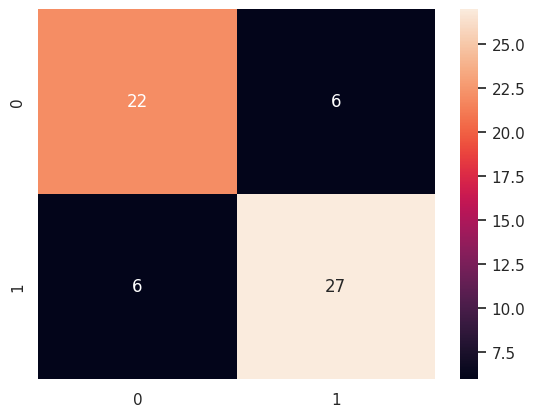

In [ ]:
sns.set()
sns.heatmap(cf_matrix, annot=True)

## **Precision**

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(X_test_prediction, Y_test)
print(precision)

0.8181818181818182


## **Recall**

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(X_test_prediction, Y_test)
print(recall)

0.8181818181818182


## **F1 Score**

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(X_test_prediction, Y_test)
print(f1)

0.8181818181818182


## **Using function we can call them**

In [ ]:
def function(prediction_labels, true_value_labels):

  precision = precision_score(prediction_labels, true_value_labels)
  recall = recall_score(prediction_labels, true_value_labels)
  f1 = f1_score(prediction_labels, true_value_labels)

  print("The precision is:-", precision)
  print("The recall is :- ", recall)
  print("The f1 score is :-", f1)

In [ ]:
function(X_train_prediction, Y_train)

The precision is:- 0.9242424242424242
The recall is :-  0.8299319727891157
The f1 score is :- 0.8745519713261649


In [ ]:
function(X_test_prediction, Y_test)

The precision is:- 0.8181818181818182
The recall is :-  0.8181818181818182
The f1 score is :- 0.8181818181818182
